<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Written digits classification with Keras

In [2]:
pip install keras

     |████████████████████████████████| 174kB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

     |████████████████████████████████| 175.3MB 6.1MB/s eta 0:00:01     |█████████████████████████▌      | 139.5MB 6.0MB/s eta 0:00:06
     |████████████████████████████████| 28.4MB 5.9MB/s eta 0:00:01    |█                               | 942kB 6.1MB/s eta 0:00:05
     |████████████████████████████████| 61kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 2.8MB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 5.7MB/s eta 0:00:01
     |████████████████████████████████| 460kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 778kB 6.3MB/s eta 0:00:01


  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=9436027707857a8387a0b5c944d2f3d5504801aa11d63f4442992cd9ff67f360
  Stored in directory: /Users/allenj/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=ebbe517659d53dc6766af67e2520d71948a26eb01f2ccc52600609fcb76cc23f
  Stored in directory: /Users/allenj/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built termcolor absl-py
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
# The digits dataset
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

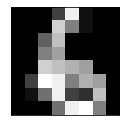

In [14]:
id = np.random.randint(len(digits.target))
plt.figure(figsize = (2, 2))
plt.imshow(digits.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
# Prepare input data
# input
X = digits.data.astype(np.uint8)
n_cols = X.shape[1]

# output
target = digits.target.astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [17]:
# Set up the model architecture
model = Sequential()

In [18]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))


# Better to go from large number to smaller 

# Add the output layer (10 digits to we want 10)
model.add(Dense(10, activation = 'softmax'))

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 12,060
Trainable params: 12,060
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Compile the model
# Optimizer tries to minimize the loss function after every epoch
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [1]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100, # number of times going backwards and forwards
    verbose = 0) # how wordy you want output to be

NameError: name 'model' is not defined

In [22]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

2/2 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9815

Test loss: 0.077144, Test accuracy: 0.981481


In [24]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [25]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

 |  0  1  2  3  4  5  6  7  8  9 
---------------------------------
0| 54  0  0  0  1  0  0  0  0  0 
1|  0 54  0  0  0  1  0  0  0  0 
2|  0  1 48  0  0  0  0  0  0  0 
3|  0  0  0 50  0  2  0  0  0  0 
4|  0  0  0  0 55  0  0  0  0  0 
5|  0  0  0  0  0 60  0  0  0  0 
6|  0  0  0  0  0  1 60  0  0  0 
7|  0  0  0  0  0  0  0 51  0  1 
8|  0  1  0  0  0  0  0  0 47  1 
9|  0  0  0  0  0  1  0  0  0 51 


KeyError: 'acc'

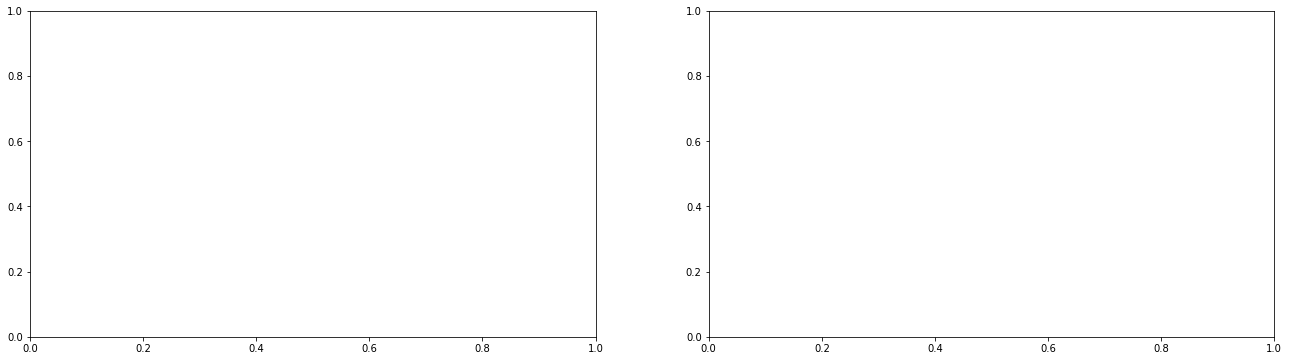

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['acc'], label = 'Training')
ax[0].plot(model.history.history['val_acc'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [27]:
def show_digit():
    id = np.random.randint(len(predictions))
    XTest = X_test[id].reshape(8, 8)
    plt.figure(figsize = (2, 2))
    plt.imshow(XTest, cmap = 'gray')
    plt.title('Prediction: %d' % predictions[id])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [28]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})
    
    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

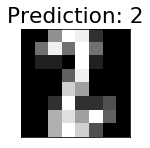

In [29]:
# show one
show_digit()

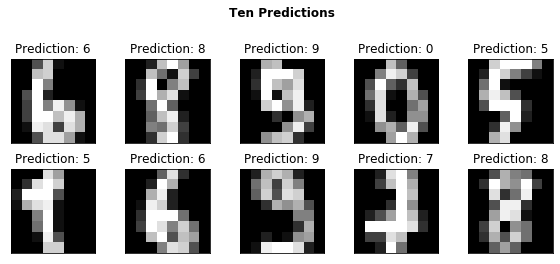

In [30]:
# show ten
show_10_digits()

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---